# Forecast the CocaCola prices. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
# read an excel file and convert into a dataframe object
Cola = pd.DataFrame(pd.read_excel("CocaCola_Sales_Rawdata.xlsx"))
Cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

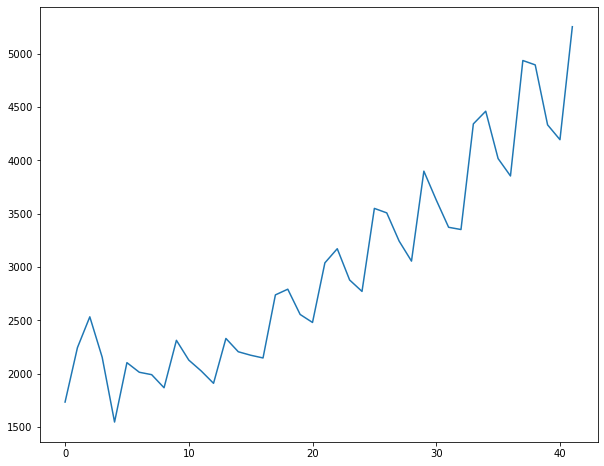

In [251]:
Cola.Sales.plot()

In [252]:
# From above lineplot of Sales values, we can state that it have Upward Linear Trend With Additive Seasonality

<AxesSubplot:ylabel='Density'>

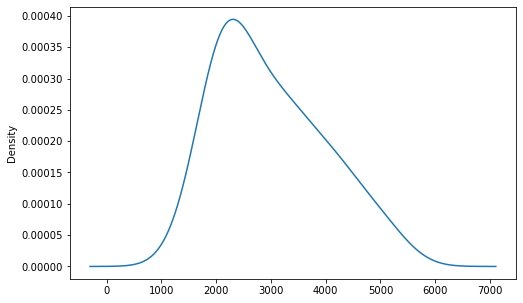

In [253]:
# Density Plot
Cola['Sales'].plot(kind = 'kde', figsize=(8,5))

In [254]:
#The above graph is showing almost a normal data

In [255]:
# We will extract Quarter values and Year values separately from 'Quarter column'
Cola['Quarters'] = 0
Cola['Year'] = 0
for i in range(42):
    p = Cola["Quarter"][i]
    Cola['Quarters'][i]= p[0:2]
    Cola['Year'][i]= p[3:5]

In [256]:
Cola

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [257]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
#Four dummy variables for quartes are created here
Quarters_Dummies = pd.DataFrame(pd.get_dummies(Cola['Quarters']))
Cola = pd.concat([Cola,Quarters_Dummies],axis = 1)
Cola

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

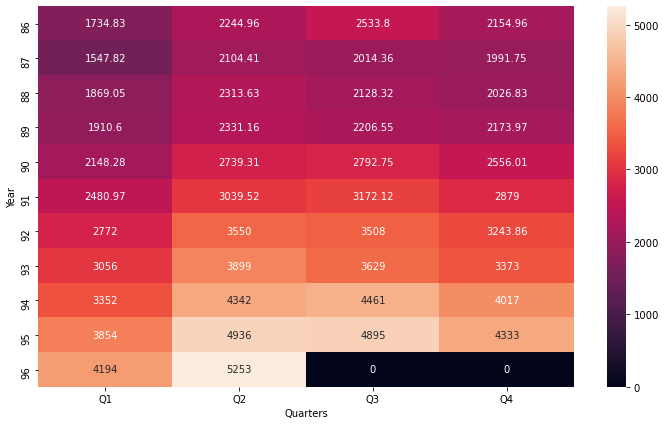

In [258]:
plt.figure(figsize=(12, 7))
heatmap_y_quarter = pd.pivot_table(data=Cola,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_quarter,annot=True,fmt="g")

<AxesSubplot:xlabel='Year', ylabel='Sales'>

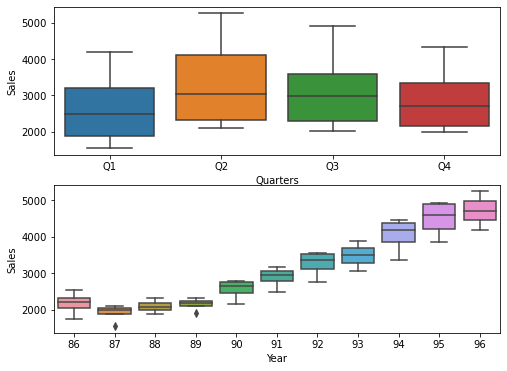

In [259]:
# Boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=Cola)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=Cola)


In [260]:
#Min Sale recorded in Q1, Max sale recorded in Q2

In [261]:
#Minimum sales are for the year 1987 and Maximum sales are for year 1996.

<AxesSubplot:xlabel='Year', ylabel='Sales'>

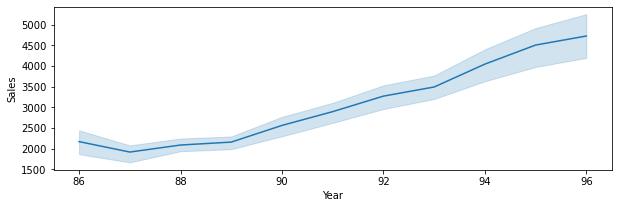

In [262]:
plt.figure(figsize=(10,3))
sns.lineplot(x="Year",y="Sales",data=Cola)

# Data Driven Forecasting Methods

In [263]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [264]:
# Splitting data into Train and Test  
train = Cola.head(36)
test = Cola.tail(6)

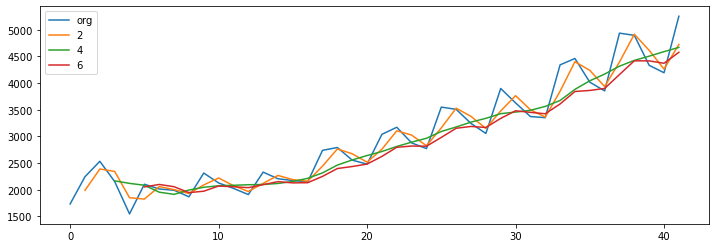

In [265]:
#Moving average method
plt.figure(figsize=(12,4))
Cola.Sales.plot(label="org")
for i in range(2,8,2):
    Cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [266]:
#With windows = 2, we are getting less deviation of the forecasting values with original values

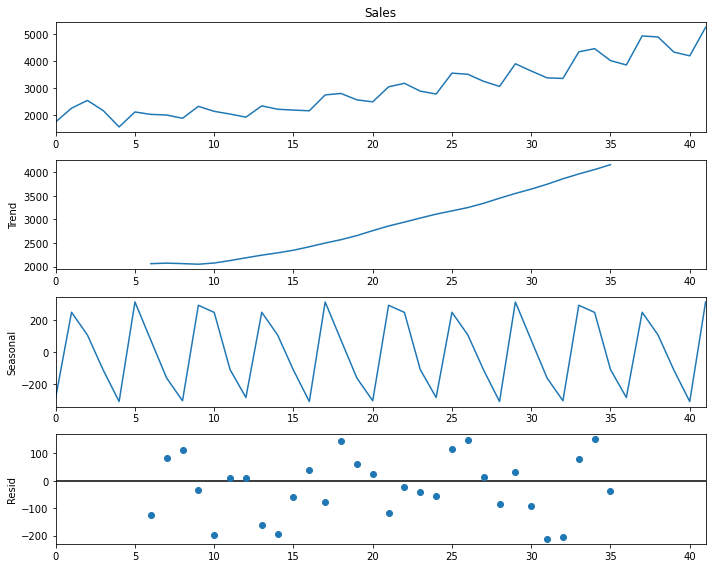

In [267]:
#Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Cola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [268]:
#Evaluation Metric RMSE
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [269]:
#Simple Exponential Method
import warnings
warnings.filterwarnings("ignore")

In [270]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_ses_model = RMSE(test.Sales, pred_ses)
rmse_ses_model

670.673507663354

In [271]:
#Holt method
hw_model = Holt(train["Sales"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse_hw_model = RMSE(test.Sales, pred_hw)
rmse_hw_model

466.68764657211995

In [272]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_add_model = RMSE(test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

135.6578171979161

In [273]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

131.57061246062597

# Final Model by combining train and test

In [274]:
hwe_model_mul_add = ExponentialSmoothing(Cola["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()

In [275]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

42    5185.044123
43    4732.563736
44    4532.640518
45    5701.817346
46    5597.448008
47    5101.639780
48    4879.365289
49    6129.793884
50    6009.851894
51    5470.715824
dtype: float64

# Model based Forecasting Methods

In [225]:
# Data preprocessing for models
Cola["t"] = np.arange(1,43)
Cola["t_squared"] = Cola["t"]*Cola["t"]

Cola["log_sales"] = np.log(Cola["Sales"])

Cola

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [226]:
# Splitting data into Train and Test  
train = Cola.head(36)
test = Cola.tail(6)

In [227]:
import statsmodels.formula.api as smf

In [228]:
#linear
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

667.4256979280378

In [229]:
#Exponential

Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

526.7672615478261

In [230]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

485.1406702070387

In [231]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1895.5593132150468

In [232]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1980.5341136713112

In [233]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

323.2127536714434

In [234]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,rmse_Mult_add_sea,323.212754
2,rmse_Quad,485.140670
1,rmse_Exp,526.767262
0,rmse_linear,667.425698
3,rmse_add_sea,1895.559313
4,rmse_Mult_sea,1980.534114


# we are getting lowest RMSE value for the Multiplicative Additive Seasonality model, we will use this as final model


# Building final model with least RMSE value

In [236]:
predict_data=Cola[['Q1','Q2','Q3','Q4','t']]
predict_data

,Q1,Q2,Q3,Q4,t
0,1,0,0,0,1
1,0,1,0,0,2
2,0,0,1,0,3
3,0,0,0,1,4
4,1,0,0,0,5
5,0,1,0,0,6
6,0,0,1,0,7
7,0,0,0,1,8
8,1,0,0,0,9
9,0,1,0,0,10


In [237]:
final_model = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=Cola).fit()
pred_final_model = pd.Series(final_model.predict(predict_data))
pred_final_model 

0     7.339224
1     7.579747
2     7.571328
3     7.491254
4     7.435892
5     7.676415
6     7.667996
7     7.587922
8     7.532561
9     7.773084
10    7.764665
11    7.684591
12    7.629229
13    7.869752
14    7.861333
15    7.781259
16    7.725898
17    7.966421
18    7.958002
19    7.877928
20    7.822566
21    8.063089
22    8.054670
23    7.974596
24    7.919235
25    8.159758
26    8.151339
27    8.071265
28    8.015903
29    8.256426
30    8.248007
31    8.167933
32    8.112572
33    8.353095
34    8.344676
35    8.264602
36    8.209240
37    8.449763
38    8.441344
39    8.361270
40    8.305909
41    8.546432
dtype: float64

In [238]:
pred_df = pd.DataFrame({'Actual' : Cola.log_sales, 'Predicted' : pred_final_model})
pred_df

,Actual,Predicted
0,7.458663,7.339224
1,7.716443,7.579747
2,7.837477,7.571328
3,7.675529,7.491254
4,7.344602,7.435892
5,7.651791,7.676415
6,7.608058,7.667996
7,7.596767,7.587922
8,7.533186,7.532561
9,7.746574,7.773084


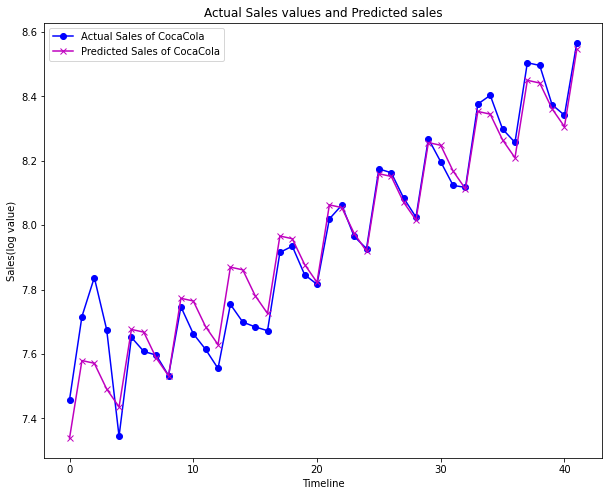

In [239]:
# Plot of Actual Sales values and Predicted sales values
plt.plot(Cola.log_sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final_model, color='m',marker='x', label='Predicted Sales of CocaCola')

plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales(log value)")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()